In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import scrubadub.detectors

import scrubadub

In [37]:
X_train = pd.read_csv("data/full_features.csv")
X_train_full = pd.read_csv("data/components/X_train.csv")

In [42]:
X_train_full.head(5)

,Summary,Text,Month,Year,Helpful,Unhelpful,TextCleaned,LemmatizedSummary,LemmatizedCleanedText,SummarySentiment,CleanedTextSentiment,ProductAvgScore,UserAvgScore,Score
0,a horror classic,i can't believe parents had a problem with thi...,12,1999,0,0,believe parents problem film scary gore film n...,a horror classic,believe parent problem film scary gore film na...,-0.5719,-0.8781,3.200000,3.781513,5.0
1,blind fury is a good movie but omega doom left...,Blind Fury is a very good if simple movie. I j...,5,2004,0,0,blind fury good simple movie could get omega d...,blind fury is a good movie but omega doom left...,blind fury good simple movie could get omega d...,-0.8151,-0.8834,2.500000,2.916667,3.0
2,lacking the lust,"Okay, I'll be honest, I have never heard of th...",2,2010,0,17,okay honest never heard story year history guy...,lacking the lust,okay honest never heard story year history guy...,0.0000,0.6808,3.750000,1.772727,1.0
3,a noir lovers delight,This is film noir at it's best. The plot is ex...,6,2013,2,0,film noir best plot excellent acting although ...,a noir lover delight,film noir best plot excellent acting although ...,0.8271,0.9081,3.750000,3.888889,5.0
4,the three story line flow well,Brings you through the life of Riddick and let...,1,2014,0,0,brings life riddick lets live difficult events...,the three story line flow well,brings life riddick let live difficult event t...,0.2732,-0.1027,3.690909,2.666667,5.0


In [11]:
X_train.groupby('Score')['SummarySentiment'].describe()

,count,mean,std,min,25%,50%,75%,max
Score,,,,,,,,
1.0,91190.0,-0.172077,0.355303,-0.9939,-0.4767,0.0000,0.0000,0.9545
2.0,89678.0,-0.059646,0.349381,-0.9794,-0.3400,0.0000,0.0000,0.9545
3.0,176079.0,0.100380,0.355619,-0.9674,0.0000,0.0000,0.4019,0.9590
4.0,335225.0,0.227354,0.361228,-0.9693,0.0000,0.2500,0.5106,0.9738
5.0,793163.0,0.296285,0.354900,-0.9764,0.0000,0.4019,0.6249,0.9954


In [12]:
X_train.groupby('Score')['CleanedTextSentiment'].describe()

,count,mean,std,min,25%,50%,75%,max
Score,,,,,,,,
1.0,91190.0,0.002555,0.732682,-0.9999,-0.7654,0.0000,0.7717,0.9997
2.0,89678.0,0.297079,0.710149,-0.9998,-0.3612,0.6249,0.9245,0.9999
3.0,176079.0,0.519533,0.619830,-0.9998,0.2960,0.8360,0.9601,0.9999
4.0,335225.0,0.653966,0.542084,-0.9999,0.6486,0.9042,0.9736,1.0000
5.0,793163.0,0.718373,0.454636,-0.9999,0.7239,0.9061,0.9682,1.0000


<Figure size 1000x600 with 0 Axes>

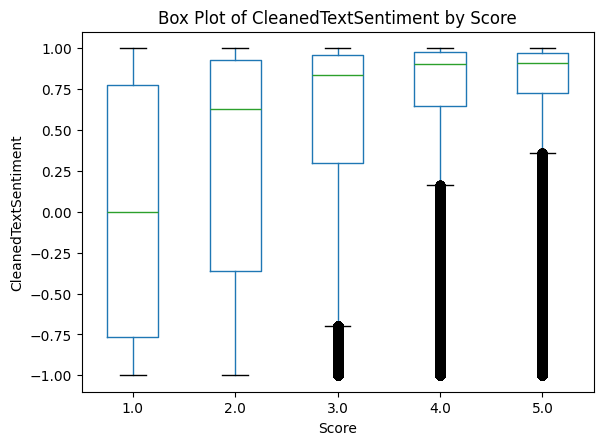

In [22]:
plt.figure(figsize=(10, 6))
X_train.boxplot(column='CleanedTextSentiment', by='Score', grid=False)
plt.title('Box Plot of CleanedTextSentiment by Score')
plt.suptitle('') 
plt.xlabel('Score')
plt.ylabel('CleanedTextSentiment')
plt.show()

<Figure size 1000x600 with 0 Axes>

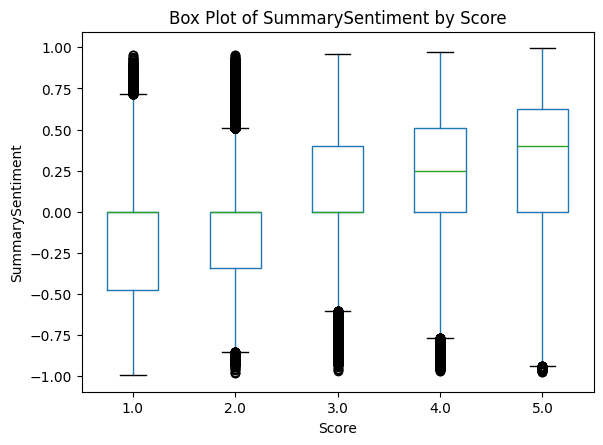

In [21]:
plt.figure(figsize=(10, 6))
X_train.boxplot(column='SummarySentiment', by='Score', grid=False)
plt.title('Box Plot of SummarySentiment by Score')
plt.suptitle('') 
plt.xlabel('Score')
plt.ylabel('SummarySentiment')
plt.show()

<Figure size 1000x600 with 0 Axes>

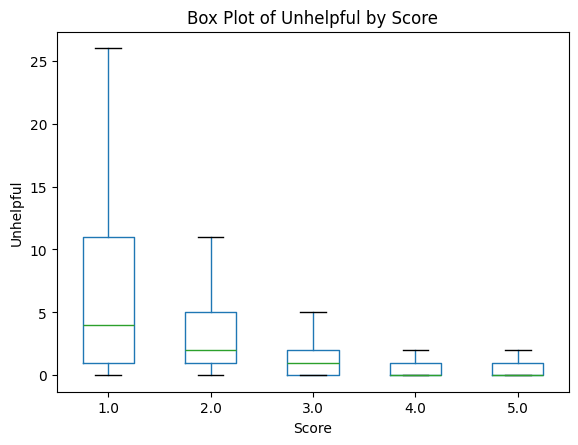

In [41]:
# WITHOUT OUTLIERS
plt.figure(figsize=(10, 6))
X_train.boxplot(column='Unhelpful', by='Score', grid=False, showfliers=False)
plt.title('Box Plot of Unhelpful by Score')
plt.suptitle('') 
plt.xlabel('Score')
plt.ylabel('Unhelpful')
plt.show()

<Figure size 1000x600 with 0 Axes>

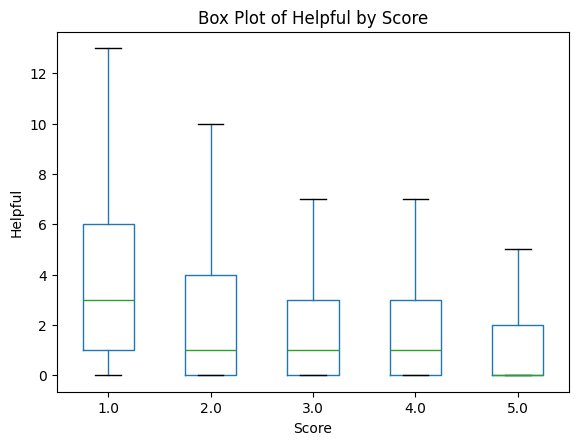

In [40]:
# WITHOUT OUTLIERS
plt.figure(figsize=(10, 6))
X_train.boxplot(column='Helpful', by='Score', grid=False, showfliers=False)
plt.title('Box Plot of Helpful by Score')
plt.suptitle('') 
plt.xlabel('Score')
plt.ylabel('Helpful')
plt.show()

<Figure size 1000x600 with 0 Axes>

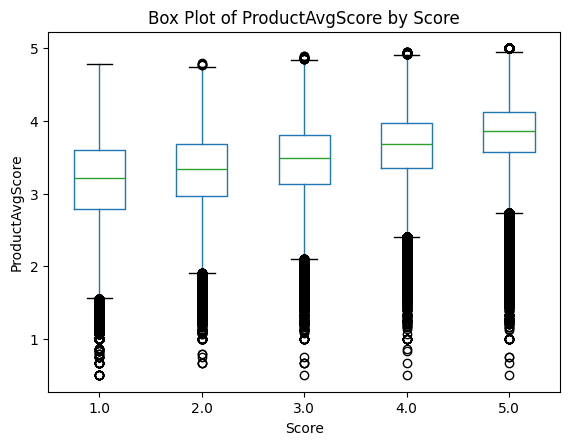

In [43]:
plt.figure(figsize=(10, 6))
X_train_full.boxplot(column='ProductAvgScore', by='Score', grid=False)
plt.title('Box Plot of ProductAvgScore by Score')
plt.suptitle('') 
plt.xlabel('Score')
plt.ylabel('ProductAvgScore')
plt.show()

<Figure size 1000x600 with 0 Axes>

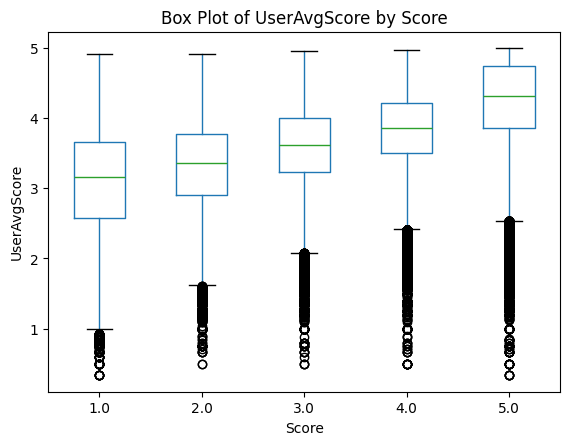

In [44]:
plt.figure(figsize=(10, 6))
X_train_full.boxplot(column='UserAvgScore', by='Score', grid=False)
plt.title('Box Plot of UserAvgScore by Score')
plt.suptitle('') 
plt.xlabel('Score')
plt.ylabel('UserAvgScore')
plt.show()

In [58]:
X_train_full['UserAndProduct'] = (X_train_full['ProductAvgScore'] + X_train_full['UserAvgScore']) / 2

In [59]:
X_train_full.groupby('Score')['UserAndProduct'].describe()

,count,mean,std,min,25%,50%,75%,max
Score,,,,,,,,
1.0,72952.0,3.104514,0.503698,0.583333,2.775740,3.138100,3.462974,4.714939
2.0,71742.0,3.298229,0.421564,0.583333,3.029080,3.322173,3.594444,4.676829
3.0,140863.0,3.511747,0.386119,1.375000,3.270304,3.532646,3.778808,4.773810
4.0,268180.0,3.736333,0.365451,1.333333,3.510103,3.760798,3.989540,4.873016
5.0,634531.0,4.038299,0.378746,1.250000,3.808654,4.074074,4.309428,5.000000


<Figure size 1000x600 with 0 Axes>

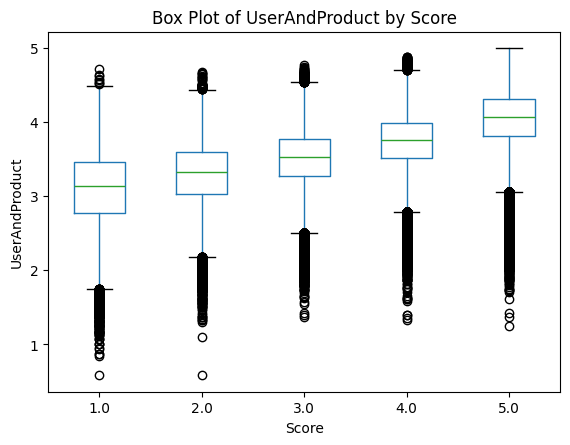

In [60]:
plt.figure(figsize=(10, 6))
X_train_full.boxplot(column='UserAndProduct', by='Score', grid=False)
plt.title('Box Plot of UserAndProduct by Score')
plt.suptitle('') 
plt.xlabel('Score')
plt.ylabel('UserAndProduct')
plt.show()

In [61]:
X_train_full['OverallSentiment'] = (X_train_full['SummarySentiment'] + X_train_full['CleanedTextSentiment']) / 2

In [62]:
X_train_full.groupby('Score')['OverallSentiment'].describe()

,count,mean,std,min,25%,50%,75%,max
Score,,,,,,,,
1.0,72952.0,-0.084726,0.429057,-0.98060,-0.454363,-0.076375,0.271062,0.94965
2.0,71742.0,0.118675,0.415839,-0.97285,-0.210413,0.214425,0.454800,0.97285
3.0,140863.0,0.310276,0.381134,-0.97105,0.130425,0.420100,0.575750,0.97430
4.0,268180.0,0.440814,0.353701,-0.98390,0.324300,0.493500,0.698300,0.98175
5.0,634531.0,0.507664,0.311629,-0.97780,0.406300,0.532650,0.745000,0.98750


<Figure size 1000x600 with 0 Axes>

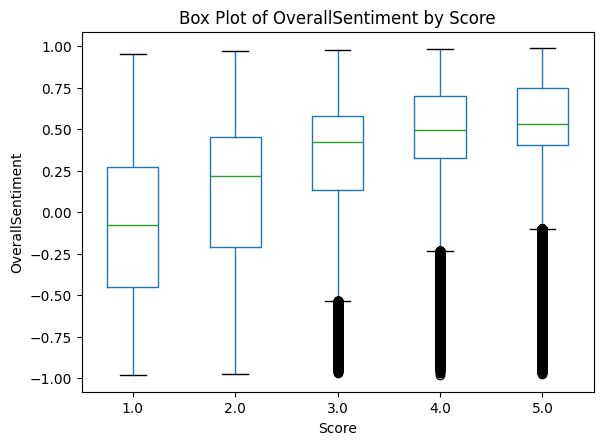

In [63]:
plt.figure(figsize=(10, 6))
X_train_full.boxplot(column='OverallSentiment', by='Score', grid=False)
plt.title('Box Plot of OverallSentiment by Score')
plt.suptitle('') 
plt.xlabel('Score')
plt.ylabel('OverallSentiment')
plt.show()

In [81]:
# SCALING HELPFUL AND UNHELPFUL
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_full['HelpfulScaled'] = scaler.fit_transform(X_train_full[['Helpful']])
X_train_full['UnhelpfulScaled'] = scaler.fit_transform(X_train_full[['Unhelpful']])

In [82]:
X_train_full.groupby('Score')['HelpfulScaled'].describe()

,count,mean,std,min,25%,50%,75%,max
Score,,,,,,,,
1.0,72952.0,1.591270,6.474406,-0.333333,0.000000,0.666667,1.666667,914.666667
2.0,71742.0,0.808392,3.442045,-0.333333,-0.333333,0.000000,1.000000,280.000000
3.0,140863.0,0.649766,4.415929,-0.333333,-0.333333,0.000000,0.666667,866.000000
4.0,268180.0,0.785296,4.465393,-0.333333,-0.333333,0.000000,0.666667,495.333333
5.0,634531.0,0.847222,6.413803,-0.333333,-0.333333,-0.333333,0.333333,1548.333333


In [83]:
X_train_full.groupby('Score')['UnhelpfulScaled'].describe()

,count,mean,std,min,25%,50%,75%,max
Score,,,,,,,,
1.0,72952.0,9.748794,20.614941,0.0,1.0,4.0,11.0,1226.0
2.0,71742.0,4.221948,8.253315,0.0,1.0,2.0,5.0,347.0
3.0,140863.0,1.972221,4.984053,0.0,0.0,1.0,2.0,703.0
4.0,268180.0,0.928682,2.356890,0.0,0.0,0.0,1.0,156.0
5.0,634531.0,0.816173,2.826122,0.0,0.0,0.0,1.0,428.0


<Figure size 1000x600 with 0 Axes>

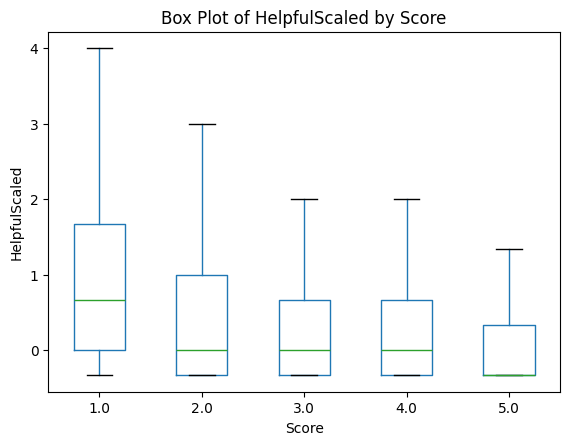

In [84]:
# WITHOUT OUTLIERS
plt.figure(figsize=(10, 6))
X_train_full.boxplot(column='HelpfulScaled', by='Score', grid=False, showfliers=False)
plt.title('Box Plot of HelpfulScaled by Score')
plt.suptitle('') 
plt.xlabel('Score')
plt.ylabel('HelpfulScaled')
plt.show()

<Figure size 1000x600 with 0 Axes>

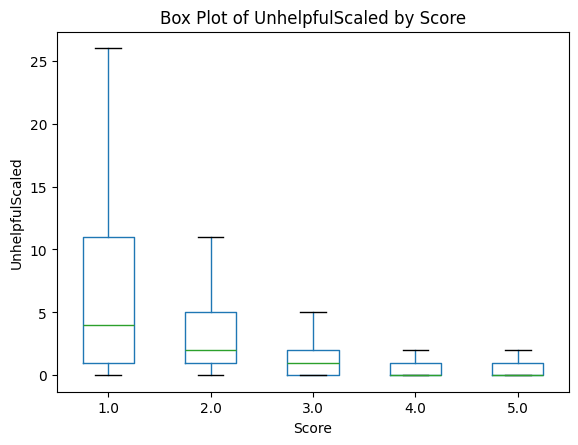

In [85]:
# WITHOUT OUTLIERS
plt.figure(figsize=(10, 6))
X_train_full.boxplot(column='UnhelpfulScaled', by='Score', grid=False, showfliers=False)
plt.title('Box Plot of UnhelpfulScaled by Score')
plt.suptitle('') 
plt.xlabel('Score')
plt.ylabel('UnhelpfulScaled')
plt.show()

In [86]:
X_train_full['OverallHelpful'] = (X_train_full['HelpfulScaled'] + X_train_full['UnhelpfulScaled']) / 2

In [87]:
X_train_full.groupby('Score')['OverallHelpful'].describe()

,count,mean,std,min,25%,50%,75%,max
Score,,,,,,,,
1.0,72952.0,5.670032,11.611761,-0.166667,0.833333,2.666667,6.333333,884.333333
2.0,71742.0,2.515170,4.872596,-0.166667,0.333333,1.166667,3.000000,174.000000
3.0,140863.0,1.310994,4.015920,-0.166667,-0.166667,0.500000,1.500000,784.500000
4.0,268180.0,0.856989,2.961907,-0.166667,-0.166667,0.166667,0.833333,257.166667
5.0,634531.0,0.831697,4.064370,-0.166667,-0.166667,0.000000,0.666667,792.166667


<Figure size 1000x600 with 0 Axes>

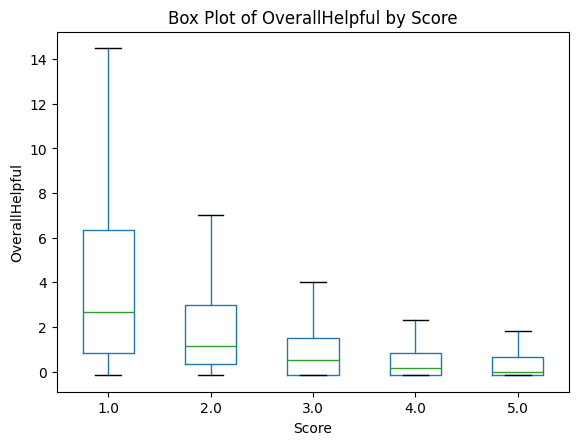

In [90]:
# WITHOUT OUTLIERS
plt.figure(figsize=(10, 6))
X_train_full.boxplot(column='OverallHelpful', by='Score', grid=False, showfliers=False)
plt.title('Box Plot of OverallHelpful by Score')
plt.suptitle('') 
plt.xlabel('Score')
plt.ylabel('OverallHelpful')
plt.show()

In [92]:
X_train

,Id,ProductId,UserId,Summary,Text,Score,Month,Year,Helpful,Unhelpful,Words,TextCleaned,LemmatizedSummary,LemmatizedCleanedText,SummarySentiment,CleanedTextSentiment,SummarySentimentDiscrete
0,914403,B0009W5KHM,AV6QDP8Q0ONK4,good fun film,While most straight to DVD films are not worth...,5.0,6,2012,2,0,While most straight to DVD films are not worth...,straight dvd films worth watching one exceptio...,good fun film,straight dvd film worth watching one exception...,0.7351,-0.5859,1
1,354887,6303079709,A2I8RXJN80A2D2,movie review,"I have wanted this one for sometime, also. I ...",5.0,1,2007,0,0,I have wanted this one for sometime also I enj...,wanted one sometime also enjoy william powell ...,movie review,wanted one sometime also enjoy william powell ...,0.0000,0.4939,0
2,1407653,B004H0M2XC,A3FHV3RV8Z12E6,when is it a good time to consent,Actually this was a pretty darn good indie fil...,4.0,12,2013,0,0,Actually this was a pretty darn good indie fil...,actually pretty darn good indie film appears w...,when is it a good time to consent,actually pretty darn good indie film appears w...,0.5859,0.9804,1
3,1377458,B003ZJ9536,A12VLTA3ZHVPUY,truth,Episodes 37 to 72 of the series press on in a ...,5.0,9,2012,1,0,Episodes to of the series press on in a refine...,episodes series press refined approach fist no...,truth,episode series press refined approach fist nor...,0.3182,0.9704,1
4,475323,630574453X,A13NM1PES9OXVN,intelligent and bittersweet stays with you,"I was really impressed with this movie, but wa...",3.0,9,2000,2,1,I was really impressed with this movie but was...,really impressed movie big fan artificial scen...,intelligent and bittersweet stay with you,really impressed movie big fan artificial scen...,0.4019,0.9972,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485330,102486,0790733935,A2069BDWIC11H1,a star is born,Natalie Woods play a excellent part of a young...,5.0,6,2007,2,0,Natalie Woods play a excellent part of a young...,natalie woods play excellent part young high s...,a star is born,natalie wood play excellent part young high sc...,0.0000,0.9735,0
1485331,135892,0792834917,A2P49WD75WHAG5,a shot in the dark will strike you like a gold...,The second Pink Panther film laid the groundwo...,5.0,8,2001,4,0,The second Pink Panther film laid the groundwo...,second pink panther film laid groundwork makin...,a shot in the dark will strike you like a gold...,second pink panther film laid groundwork makin...,0.2500,0.9821,1
1485332,534484,B00003CXRM,AUM3YMZ0YRJE0,odyssey in mississippi,This is one of the funniest films I have seen ...,4.0,9,2004,2,3,This is one of the funniest films I have seen ...,one funniest films seen years full classical r...,odyssey in mississippi,one funniest film seen year full classical ref...,0.0000,0.8957,0
1485333,654188,B00005JPNY,A1D3XQC2DIT,very fun fantasy adventure story,Lyra Belacqua (Dakota Blue Richards) is a stub...,4.0,12,2007,9,4,Lyra Belacqua Dakota Blue Richards is a stubbo...,lyra belacqua dakota blue richards stubborn gi...,very fun fantasy adventure story,lyra belacqua dakota blue richards stubborn gi...,0.7316,0.9855,1


<Figure size 1000x600 with 0 Axes>

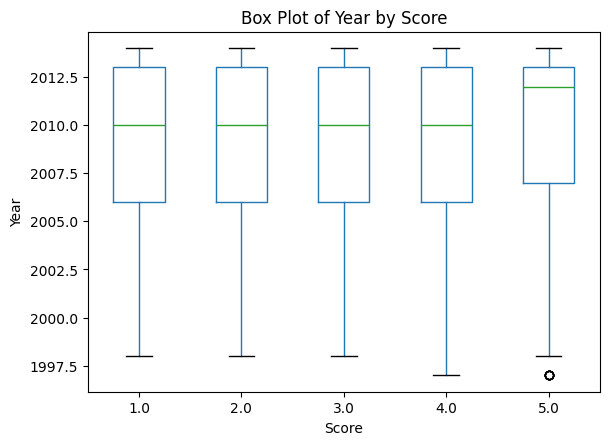

In [95]:
plt.figure(figsize=(10, 6))
X_train.boxplot(column='Year', by='Score', grid=False)
plt.title('Box Plot of Year by Score')
plt.suptitle('') 
plt.xlabel('Score')
plt.ylabel('Year')
plt.show()

<Figure size 1000x600 with 0 Axes>

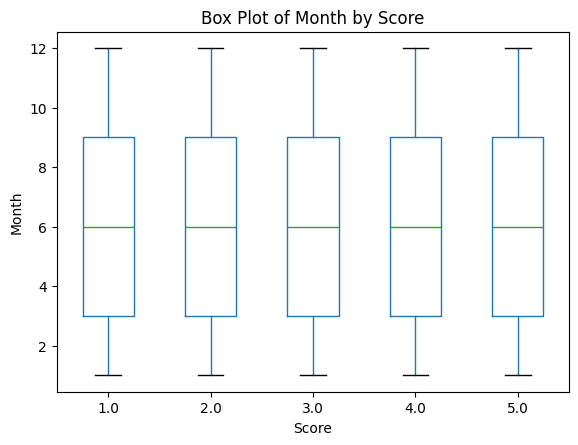

In [94]:
plt.figure(figsize=(10, 6))
X_train.boxplot(column='Month', by='Score', grid=False)
plt.title('Box Plot of Month by Score')
plt.suptitle('') 
plt.xlabel('Score')
plt.ylabel('Month')
plt.show()